In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

1. Loading the DataSet

In [5]:
data=sns.load_dataset("tips")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Data Checking

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


3. Stats of the DataSet

In [8]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


4. Relation Check

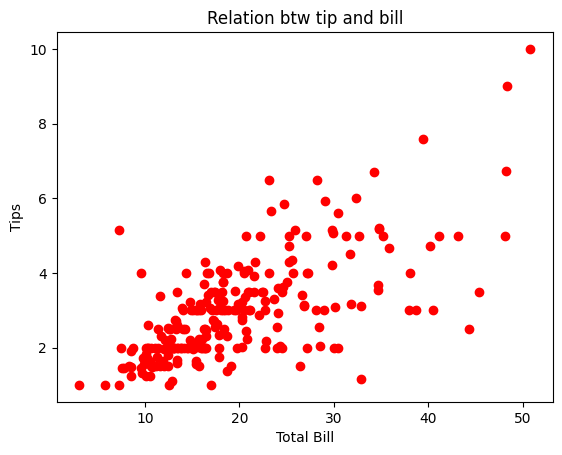

In [10]:
import matplotlib.pyplot as plt
plt.scatter(data['total_bill'],data['tip'],c="Red")
plt.xlabel("Total Bill")
plt.ylabel("Tips")
plt.title("Relation btw tip and bill")
plt.show()

From above graph we say that +ve relation btw tip and bill.

RelationShip is almost a straight line



4. Feature and Target Separation

In [11]:
# Observations is x a 2D input
x=data[['total_bill']]
y=data['tip']

5. Test and train splitting

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

6. Feature Standardization

Why ...?

compare the co-efficents fairly

Avoid dominance of large values

Prepaer for Ridge/lasso

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
##  Imp :
## Fit is only appliable on training data
## Prevents the data leakge

7. Model building and predicting

In [29]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)
print("Slope :",model.coef_[0])
print("Intercept :",model.intercept_)
y_pred=model.predict(x_test_scaled)

Slope : 0.9357171400271824
Intercept : 3.0877948717948724


8. Performance Metrics

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("r2_score = ",r2_score(y_test,y_pred))
print("mae = ",mean_absolute_error(y_test,y_pred))
print("mse = ",mean_squared_error(y_test,y_pred))

r2_score =  0.43098037756046925
mae =  0.712842305985795
mse =  0.7112582229473627


9. Plotting of SLR

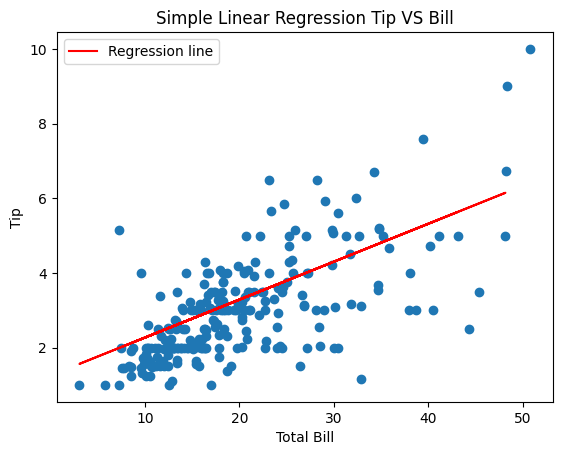

In [36]:
from ipywidgets import Label
plt.figure()
plt.scatter(x,y)
plt.plot(x_test, y_pred, label="Regression line",c='red')
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Simple Linear Regression Tip VS Bill")
plt.legend()
plt.show()

10. Predications of real time data as user input

In [39]:
bill=float(input("Enter the bill amount"))
bill_scale=scaler.transform([[bill]])
pred=model.predict(bill_scale)
print(f" Predicated tip is : {pred[0]}")

Enter the bill amount23.90
 Predicated tip is : 3.6804632389385


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
